## Welcome to the miRNA Heatmap. The goal of this project is as follows:

1) Display 8-length sequences of 'A', 'T', 'G', 'C', in a 2d map

2) create heatmap of known miRNA using the 2d array

Lets import some librarys and then we can get started!

In [28]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
from numpy import loadtxt

from collections import Counter

from sklearn import preprocessing

SIZE = 7

The challenge of creating a 2D array of sequences is deciding how to organize it. We started by deciding that each corner would correspond to a particular nucleotide. To accomplish this, I created a fucntion that generates the different ATGC strings and sorts them according to the frequency of a given character. The Counter(str) function below counts the frequency of each character in the str, and adds it to an array if it is above a given threshold. Keep in mind, if the frequency of each character is the same, the first occuring character is considered the most frequent. By the nature of how the string are generated, this means that the same number of strings will be added to each array. 

Note the 'sorted()' function in the return line. This function sorts the array by frequency of a character, for example, if we are generating sequences with precedence 't', then 'tttttttt' would be sorted to the front of the list, followed by 'ttttttta' and 'tttttttc' and so on. 

In [27]:
#Generate tables (the order of the char in arr will affect the list outputted)

def list_generate(char):
    arr = ['A','T','C','G']
    list_= []

    for a in arr:
        for b in arr:
            for c in arr:
                for d in arr:
                    for e in arr:
                        for f in arr:
                            for g in arr:
                                str = a+b+c+d+e+f+g
                                res = Counter(str)
                                res = max(res, key = res.get)
                                if(res==char):
                                    list_.append(str)
                                    
                                    
    #sort the array by char frequency

    return sorted(list_, key = lambda ele: -ele.count(char))


We now have 4 1d arrays containing all 65,536 sequences. In order to display them in a map, however, we have to convert the 1d arrays into a 2d representation. Because we have sorted them by frequency, we can fill a 2d array starting in the top left corner and filling in the diagnals, as shown in the picture below. 
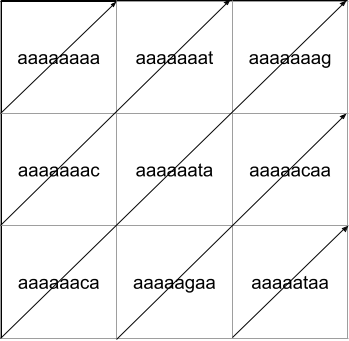

To do this, we simply iterate through the table and sum(row, col). The sum(row, col) corresponds to the diagnals of the array, which we can fill linearly with the array from before.

In [29]:
#generate 2d array from 1d list, print to .csv
def map_generate(list_, table_size):
    map_ = [[0 for i in range(table_size)] for j in range(table_size)]
    counter = 0;
    number = 0
    
    while(number < table_size*2):
        for i in range(0,table_size):
            for j in range(0,table_size):
                if (j+i==number):
                    map_[i][j]=list_[counter]
                    counter+=1
        number+=1
    return map_

We now can print each array out in the form of a spreadsheet (.csv). 

In [30]:
#print map
def print_map(filename, map_):
    df=pd.DataFrame(map_)
    df.to_csv(filename+'.csv', index= False, header = False)


We're almost done, however, due to the way we generated each 2d array, the top left corner of each spreadsheet contains the homopolymer ('tttttttt', 'cccccccc', 'gggggggg', 'aaaaaaaa') and gets filed outward from there. In order to complete the full map, we must rotate the spreadsheets to correspond to the 4 corners of the map. To do this, we use some simple matrix multiplication to rotate the spreadsheets. 

In [31]:
#print 90 deg anticlockwise rotation of matrix
def rotate_map(map_, rotations):
    df= pd.DataFrame(map_)
    for i in range(0,rotations%4):
        df = df.T
        df = df.loc[::-1]
    return df



We're finally ready to generate the full map. To do this, we generate each map separately, then rotate the spreadsheets accordingly, and stitch them back together (ideally, I would write some code to stitch them together, but for now I just copy and paste them together manually. It wouldn't be that hard to write, I'm just lazy). 

In [32]:
#
list_a = list_generate('A')
list_c = list_generate('C')
list_g = list_generate('G')
list_t = list_generate('T')

map_a = map_generate(list_a, 2**(SIZE-1))
map_c = map_generate(list_c, 2**(SIZE-1))
map_g = map_generate(list_g, 2**(SIZE-1))
map_t = map_generate(list_t, 2**(SIZE-1))

#rotate map_c 90°
map_c = rotate_map(map_c, 1)

#rotate map_t 180°
map_t = rotate_map(map_t, 2)

#rotate map_g 270°
map_g = rotate_map(map_g, 3)

print_map('arr_A', map_a)
print_map('arr_C', map_c)
print_map('arr_G', map_g)
print_map('arr_T', map_t)

Now that we have our completed spreadsheet, we can convert that into a heatmap using pyplot. Below are a few examples of what can be done with the data spreadsheet. 

In [33]:
#function that takes in a character and an array and returns an array with the corresponding frequency of the given character
def map_degree_char(c, arr):
    map_ = [[0 for i in range(len(arr))] for j in range(len(arr))]
    for i in range(0, len(arr)):
        for j in range(0, len(arr[i])):
            map_[i][j] = Counter(arr[i][j])[c]
            
    return map_


In [34]:
#function that takes in an array and returns an array with character of greatest frequency
def map_degree(arr):
    map_ = [[0 for i in range(len(arr))] for j in range(len(arr))]
    for i in range(0, len(arr)):
        for j in range(0, len(arr[i])):
            res = Counter(arr[i][j])
            res = max(res, key = res.get) 
            map_[i][j] = Counter(arr[i][j])[res]
            
    return map_


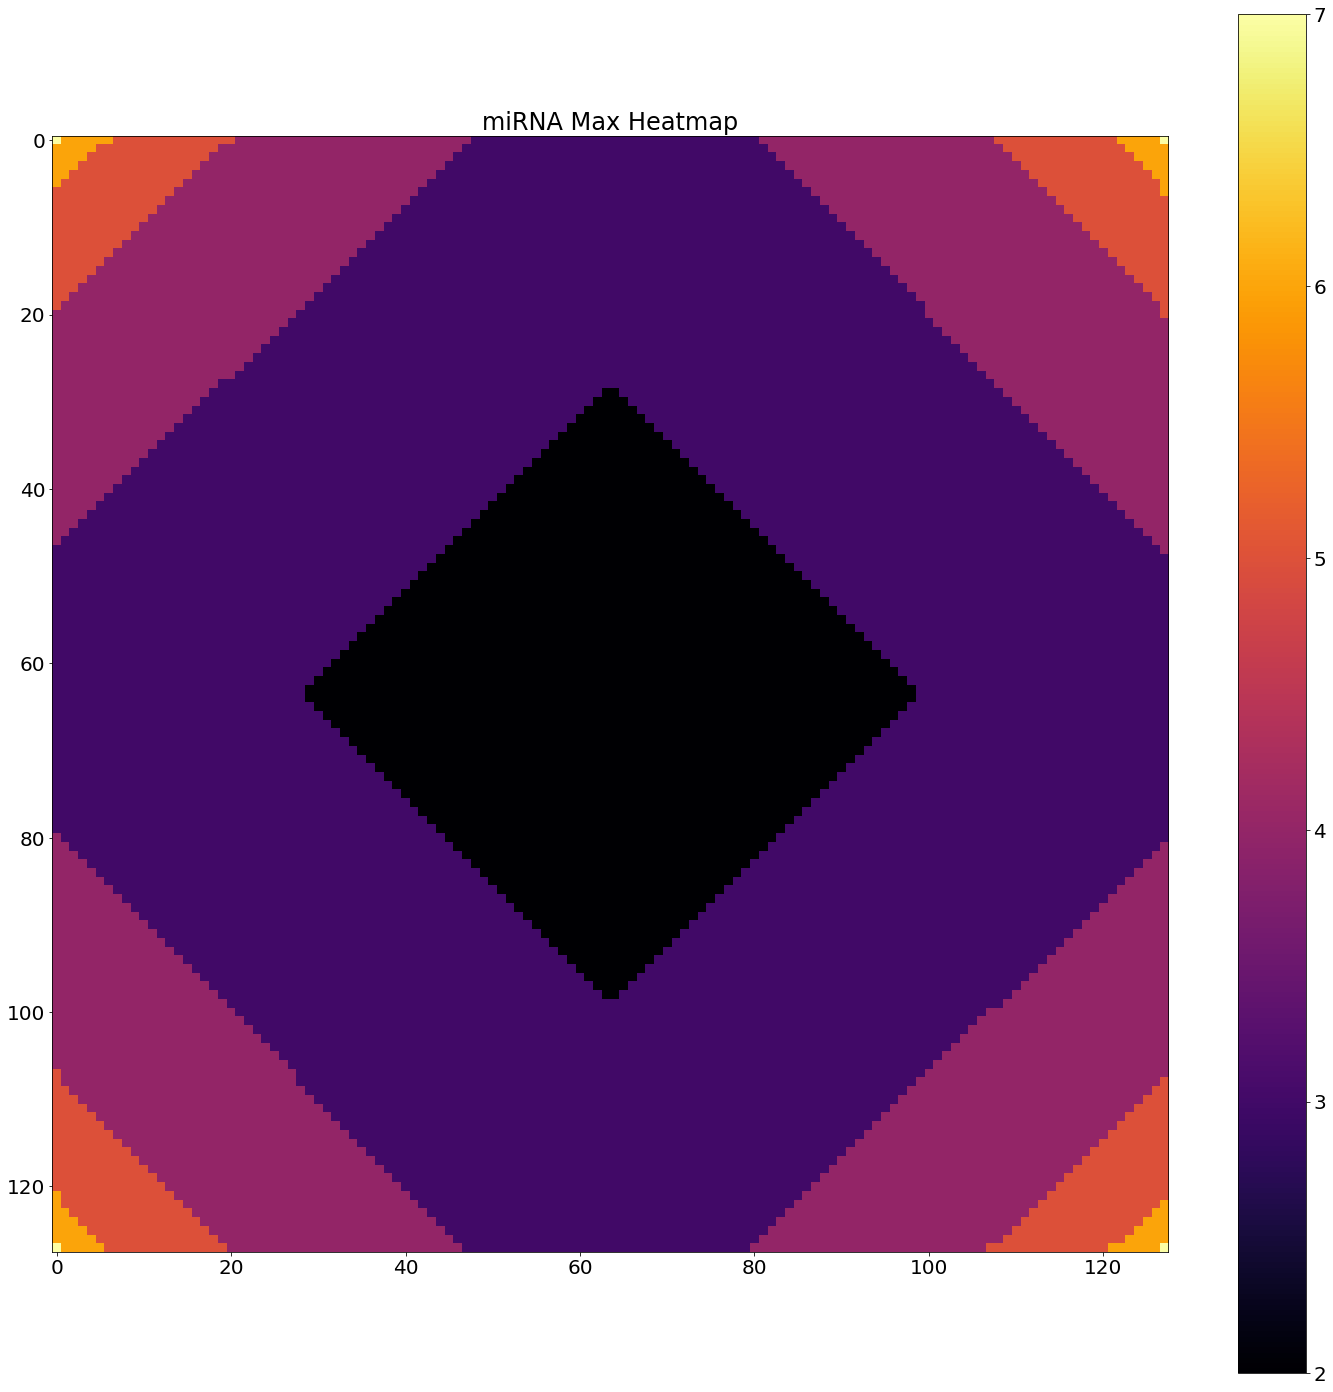

In [35]:
df = pd.read_csv("AGTC-7seq.csv", header = None)
data = np.array(df)
data = map_degree(data)


fig = plt.figure(figsize=(25,25))
plt.imshow(data,cmap="inferno")
plt.rc('font', size=20)
plt.title("miRNA Max Heatmap")
plt.colorbar()
plt.savefig('miRNA Max Heatmap.png')
plt.show()


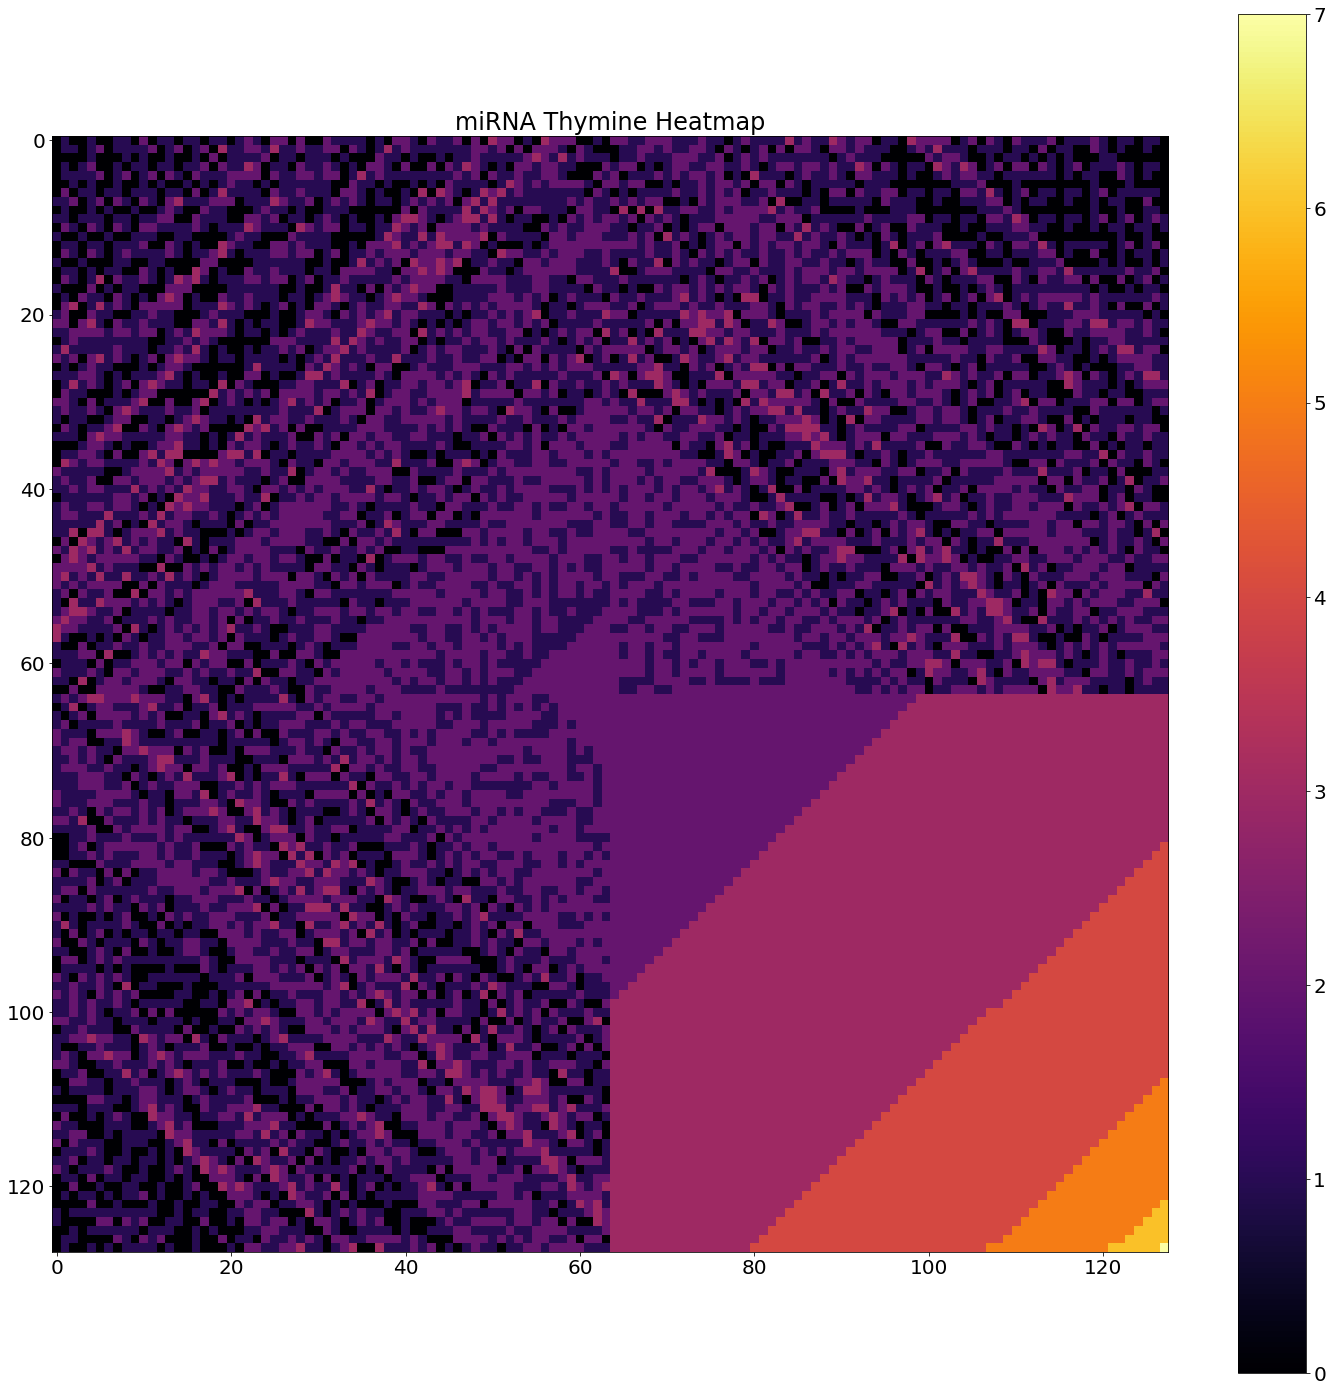

In [38]:
df = pd.read_csv("AGTC-7seq.csv", header = None)
data = np.array(df)
data = map_degree_char('T',data)

fig = plt.figure(figsize=(25,25))
plt.imshow(data,cmap="inferno")
plt.rc('font', size=20)
plt.title("miRNA Thymine Heatmap")
plt.colorbar()
plt.savefig('miRNA Thymine Heatmap.png')
plt.show()

## Reading miRNA Data
Our goal now is to take the data from [TargetScanHuman](https://www.targetscan.org/cgi-bin/targetscan/data_download.vert80.cgi) or from zebrafish_data.txt in the github folder. The format of this data will need to be processed into an array. We'll use the numpy loadtext:

In [39]:
zebrafish_data = loadtxt("zebrafish_data.txt", comments=">", delimiter="\z",dtype="str")


#this is just a formality, but we have to remove all sequences with the 'N' character for now
zebrafish_data = list(zebrafish_data)
print(len(zebrafish_data))
for i in zebrafish_data:
    if 'N' in i:
        zebrafish_data.remove(i)
print(len(zebrafish_data))


20889
20834


We now have an array with elements of nucleotide sequences. Next, we have to count the frequency of each 8-character nucleotide sequence. To keep track of the numbers, lets first convert our 2D map into a 1D array and then convert that into a dictionary:

In [40]:
df = pd.read_csv("AGTC-7seq.csv", header = None)
data_arr = np.array(df).flatten()


data_dict = {data_arr[i]: 0 for i in range(0, len(data_arr))}

Aight bet. Now that we have a dictionary, lets make a function with parameters (dict, str), and iterates through the string 8-characters at a time:

In [41]:
def sequence_count(string, dictionary, length):
    for i in range(len(string)-(length-1)):
        temp_seq = string[i:i+length]
        dictionary[temp_seq]+= 1
    return dictionary

OMG too easy. Lets fill the dictionary with all of the values from the string sequences:

In [42]:
#1) Update the dictionary:
for i in zebrafish_data:
    data_dict= sequence_count(i,data_dict, SIZE)


#2) Convert dictionary back into 1D array
data_arr1 = np.array(list(data_dict.values()))

All that's left now is to convert the data back into its original 2D array, and then print it as a map!

In [43]:
#Convert 1D array back into a 2D array
data_arr2 = np.reshape(data_arr1, (2**SIZE,2**SIZE))

#save the map as a csv
print_map('zebrafish_map', data_arr2)

#standardized the data with mean ans std, then putting it through a sigmoid function 
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

data_arr2 = (data_arr2 - data_arr2.mean())/(data_arr2.std())

data_arr2 = sigmoid(data_arr2)

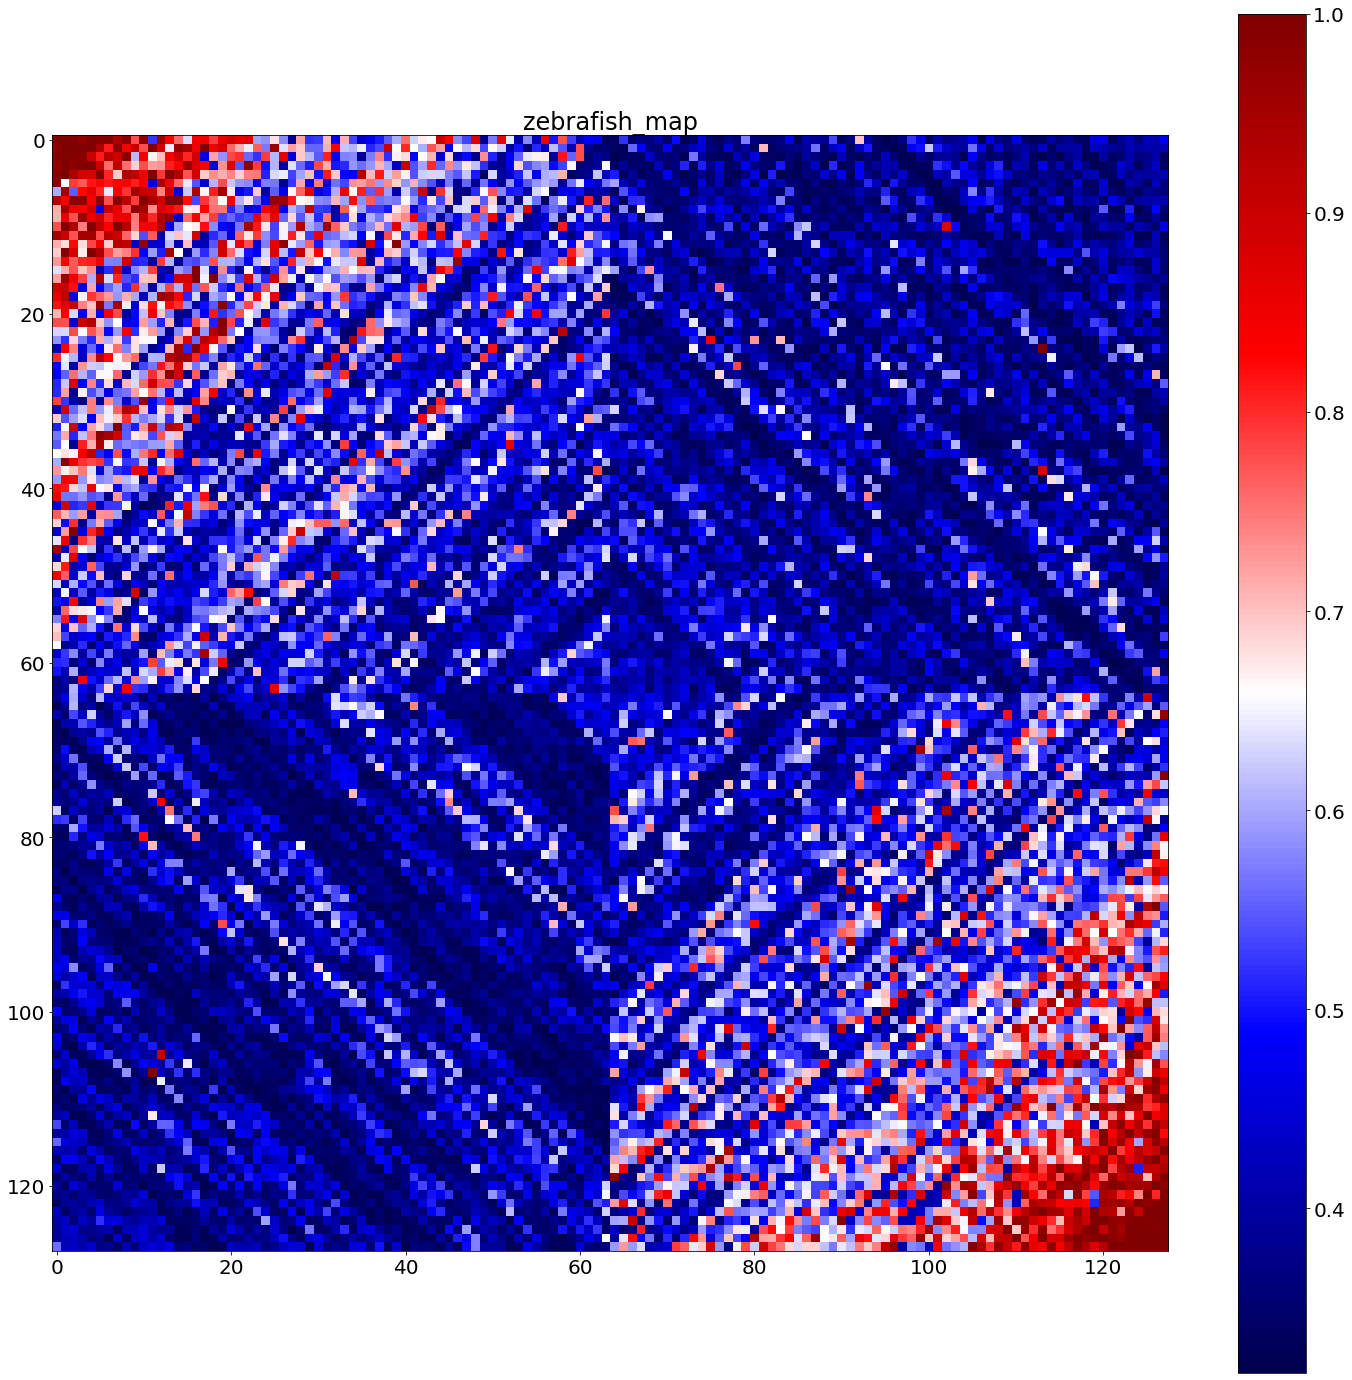

In [45]:

fig = plt.figure(figsize=(25,25))
plt.imshow(data_arr2,cmap="seismic")
plt.title("zebrafish_map")
plt.colorbar()
plt.savefig('Zebrafish Sequence Map')
plt.show()

## Post Script:

The sequence data is pretty unique. In order to understand it better, I'm going to print out a table of tuples, with the sequece and value:

In [47]:
#convert dictionary to list of tuples
data_tuples1d = list(data_dict.items())

#Convert tuples into a list of strings
data_string1d = []
delimiter = ':'
for i in data_tuples1d:
    data_string1d.append(delimiter.join([str(value) for value in i]))

#convert strings into 2D array
data_string2d = np.reshape(data_string1d, (128,128))

print(data_string2d)

#save the map as a csv
print_map('Zebrafish Dictionary', data_string2d)


[['AAAAAAA:44774' 'AAAAAAT:13158' 'AAAAAAG:9705' ... 'GTGGGGG:814'
  'TGGGGGG:746' 'GGGGGGG:1185']
 ['AAAAAAC:7998' 'AAAAATA:12662' 'AAAATAA:14490' ... 'GGTGGGG:725'
  'GAGGGGG:710' 'AGGGGGG:747']
 ['AAAAACA:11297' 'AAAACAA:11330' 'AAAGAAA:9131' ... 'GGGCGGG:489'
  'GGAGGGG:698' 'CGGGGGG:204']
 ...
 ['CACCCCC:637' 'CCCACCC:913' 'CCCCCTC:992' ... 'TTTTCTT:11108'
  'TTTTTTC:11435' 'TTTTATT:19513']
 ['ACCCCCC:576' 'CTCCCCC:790' 'CCCTCCC:858' ... 'TTTTTTA:18200'
  'TTTATTT:24475' 'TATTTTT:18339']
 ['CCCCCCC:1773' 'TCCCCCC:831' 'CCACCCC:883' ... 'TTATTTT:20030'
  'ATTTTTT:16884' 'TTTTTTT:59657']]


In [ ]:
#This tuple example is also very useful for the 4 cell idea we were thinking of, by maybe makig tuples I can print them out as columns and rows
#see example below:
#convert dictionary to list of tuples
data_tuples1 = list(data_dict.items())


#convert tuples into 2D array
data_tuples2 = np.reshape(data_tuples1, (128*2,256))

#save the map as a csv
print_map('Zebrafish Tuples', data_tuples2)